# Dados sobre a violência contra as mulheres no Brasil - (2019)
Denúncias de violência contra a mulher registradas pelo Ligue: 180 (Central de Atendimento à mulher).

**Dados estratificados:**
Estes primeiros dados que encontrei estão estratificados, cada variável estava separada em um arquivo csv.
Estratificar dados é o processo de separar as informações em coleções menores e mais gerenciáveis para análise). 

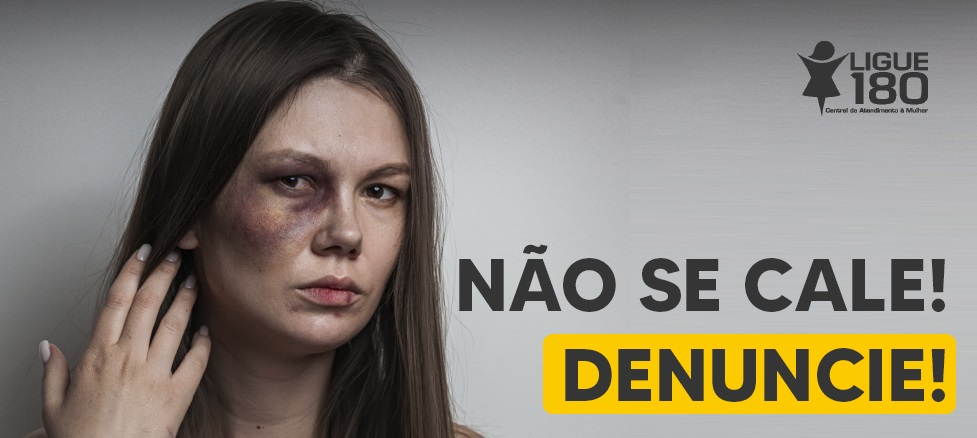

## PRIMEIROS DADOS ENCONTRADOS SOBRE O TEMA (2019)
Os dados foram tratados, concatenados e salvos em um único arquivo .cvs

In [1]:
# Importando bibliotecas
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Dados relação vítima x suspeito
dataset_relacao_vitima_suspeito = pd.read_csv('2019/2019_lig_vitima_suspeito2.csv')

# Dados vítima
dataset_escolaridade_vitima = pd.read_csv('2019/2019_escol_vitima.csv')
dataset_idade_vitima = pd.read_csv('2019/2019_idade_vitima.csv')
dataset_raca_vitima = pd.read_csv('2019/2019_raca_vitima.csv')

# Dados suspeito
dataset_idade_suspeito = pd.read_csv('2019/2019_idade_suspeito.csv')
dataset_raca_suspeito = pd.read_csv('2019/2019_raca_suspeito.csv')

# Tipo de violação
dataset_tipo_violacao = pd.read_csv('2019/2019_tipo_violacao.csv')

In [3]:
# Exibindo a estrutura da primeira tabela
dataset_relacao_vitima_suspeito.head()

,Relação Vitima x Suspeito,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,Amigo(a),78,59,62,57,42,39,36,56,35,44,33,17,558
1,Avó,11,15,4,8,11,4,3,3,8,2,3,4,76
2,Avô,3,3,1,5,3,4,2,5,3,6,4,3,42
3,Bisneto(a),2,9,3,1,0,1,1,1,0,0,1,1,20
4,Chefe,0,0,7,15,10,11,8,16,11,15,12,6,111


In [4]:
# teste
# Tratando os dados do primeiro arquivo

# Melt para reorganizar dados do DataFrame
df_melted_teste = pd.melt(dataset_relacao_vitima_suspeito, id_vars=['Relação Vitima x Suspeito'], value_vars=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], var_name='mes', value_name='n_ocorrencia_mes')

df_melted_teste = df_melted_teste.rename(columns={'Relação Vitima x Suspeito' : 'ocorrencia'})

df_melted_teste['variavel'] = 'relacao_vitima_suspeito'

ordem = ['mes', 'variavel', 'ocorrencia', 'n_ocorrencia_mes']

df_melted_tipo_relacao = df_melted_teste[ordem]

df_melted_tipo_relacao


,mes,variavel,ocorrencia,n_ocorrencia_mes
0,Jan,relacao_vitima_suspeito,Amigo(a),78
1,Jan,relacao_vitima_suspeito,Avó,11
2,Jan,relacao_vitima_suspeito,Avô,3
3,Jan,relacao_vitima_suspeito,Bisneto(a),2
4,Jan,relacao_vitima_suspeito,Chefe,0
...,...,...,...,...
463,Dez,relacao_vitima_suspeito,Sobrinho(a),17
464,Dez,relacao_vitima_suspeito,Sogro(a),6
465,Dez,relacao_vitima_suspeito,Subordinado,0
466,Dez,relacao_vitima_suspeito,Tio (a),23


In [5]:
# Já que o teste acima funcionou irei aplicar uma 'def' para tratar os próximos csv,
# já que estão no mesmo padrão do anterior

def df_melted(vr, csv, id_vr):   
    df_novo = pd.melt(csv, id_vars=[id_vr], value_vars=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], var_name='mes', value_name='n_ocorrencia_mes')
    df_novo.columns.values[0]= 'ocorrencia'
    df_novo['variavel'] = vr
    ordem = ['mes', 'variavel', 'ocorrencia', 'n_ocorrencia_mes']
    df_novo = df_novo[ordem]
       
    return df_novo

In [6]:
# Tratando os dados da vitima
df_melted_escolaridade_vit = df_melted('escolaridade_da_vitima', dataset_escolaridade_vitima, 'Escolaridade da Vitima')
df_melted_idade_vit = df_melted('idade_vitima', dataset_idade_vitima, 'Faixa Etaria Vitima')
df_melted_raca_vit = df_melted('raca_vitima', dataset_raca_vitima, 'Raca Vitima')
df_melted_tipo_violacao = df_melted('tipo_violacao', dataset_tipo_violacao, 'Violacao')

In [7]:
# Tratando os dados do suspeito
df_melted_idade_susp = df_melted('idade_suspeito', dataset_idade_suspeito, 'Faixa Etaria Suspeito')
df_melted_raca_susp = df_melted('raca_suspeito', dataset_raca_suspeito, 'Raca Suspeito')

In [8]:
# Concatenar dataframes tratados
df_geral = pd.concat([df_melted_tipo_relacao, df_melted_escolaridade_vit, df_melted_idade_vit, df_melted_raca_vit, df_melted_tipo_violacao, df_melted_idade_susp, df_melted_raca_susp], ignore_index=True)

In [9]:
# Tratar coluna meses
# Mapeie o nome do mês para o número correspondente
meses = {
    'Jan': 1, 'Fev': 2, 'Mar': 3, 'Abr': 4, 'Mai': 5, 'Jun': 6,
    'Jul': 7, 'Ago': 8, 'Set': 9, 'Out': 10, 'Nov': 11, 'Dez': 12
}

df_geral['mes'] = df_geral['mes'].map(meses)
df_geral['mes'] = df_geral['mes'].astype(str)

In [10]:
# colunas
df_geral.columns

Index(['mes', 'variavel', 'ocorrencia', 'n_ocorrencia_mes'], dtype='object')

In [11]:
# registros
numero_de_registros = df_geral.shape[0]
print(f'N° de registros: {numero_de_registros}')

df_geral.shape

N° de registros: 1452


(1452, 4)

In [12]:
# info
df_geral.info()
df_geral.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mes               1452 non-null   object 
 1   variavel          1452 non-null   object 
 2   ocorrencia        1452 non-null   object 
 3   n_ocorrencia_mes  1447 non-null   float64
dtypes: float64(1), object(3)
memory usage: 45.5+ KB


mes                  object
variavel             object
ocorrencia           object
n_ocorrencia_mes    float64
dtype: object

In [13]:
df_geral.isnull().sum()

mes                 0
variavel            0
ocorrencia          0
n_ocorrencia_mes    5
dtype: int64

In [14]:
# Resolver vazio antes de converter
observacoes_com_nan = df_geral[df_geral['n_ocorrencia_mes'].isna()]
print(observacoes_com_nan)

    mes       variavel                ocorrencia  n_ocorrencia_mes
910   1  tipo_violacao  Tentativa de Feminicídio               NaN
911   1  tipo_violacao    Tentativa de Homicídio               NaN
933   2  tipo_violacao  Tentativa de Feminicídio               NaN
934   2  tipo_violacao    Tentativa de Homicídio               NaN
957   3  tipo_violacao    Tentativa de Homicídio               NaN


In [15]:
# Remover registros/observações inválidas
df_geral = df_geral.dropna(subset=['n_ocorrencia_mes'])

In [16]:
df_geral.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 0 to 1451
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mes               1447 non-null   object 
 1   variavel          1447 non-null   object 
 2   ocorrencia        1447 non-null   object 
 3   n_ocorrencia_mes  1447 non-null   float64
dtypes: float64(1), object(3)
memory usage: 56.5+ KB


In [17]:
# Tratar valores numéricos
pd.to_numeric(df_geral['n_ocorrencia_mes'], errors='coerce')

# Remover valores vazios
df_geral = df_geral.dropna(subset=['n_ocorrencia_mes'])

# Converter para float->int
df_geral['n_ocorrencia_mes'] = df_geral['n_ocorrencia_mes'].astype(int)

In [18]:
df_geral.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 0 to 1451
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   mes               1447 non-null   object
 1   variavel          1447 non-null   object
 2   ocorrencia        1447 non-null   object
 3   n_ocorrencia_mes  1447 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 56.5+ KB


In [19]:
# Salvo o arquivo csv unificado com todas as informações coletadas!
df_geral.to_csv('df_novo_2019.csv')

----------------------------------------------------------------------------------------------------------------

## PERGUNTAS INICIAIS:

**SOBRE A VÍTIMA:**
- Tipo de relação entre vítima/suspeito com mais relato de abuso;
- Escolaridade da maior parte das vítimas;
- Idade e raça que mais relata abuso;
- Tipo de violação mais comum de ser denunciada.

**SOBRE O SUSPEITO:**
- Idade e raça que mais é acusado;

## RELAÇÃO VÍTIMA X SUSPEITO
### 1) Qual o tipo de relação entre vítima/suspeito com mais relato de abuso/violência?

In [20]:
df_geral['variavel'].unique()

array(['relacao_vitima_suspeito', 'escolaridade_da_vitima',
       'idade_vitima', 'raca_vitima', 'tipo_violacao', 'idade_suspeito',
       'raca_suspeito'], dtype=object)

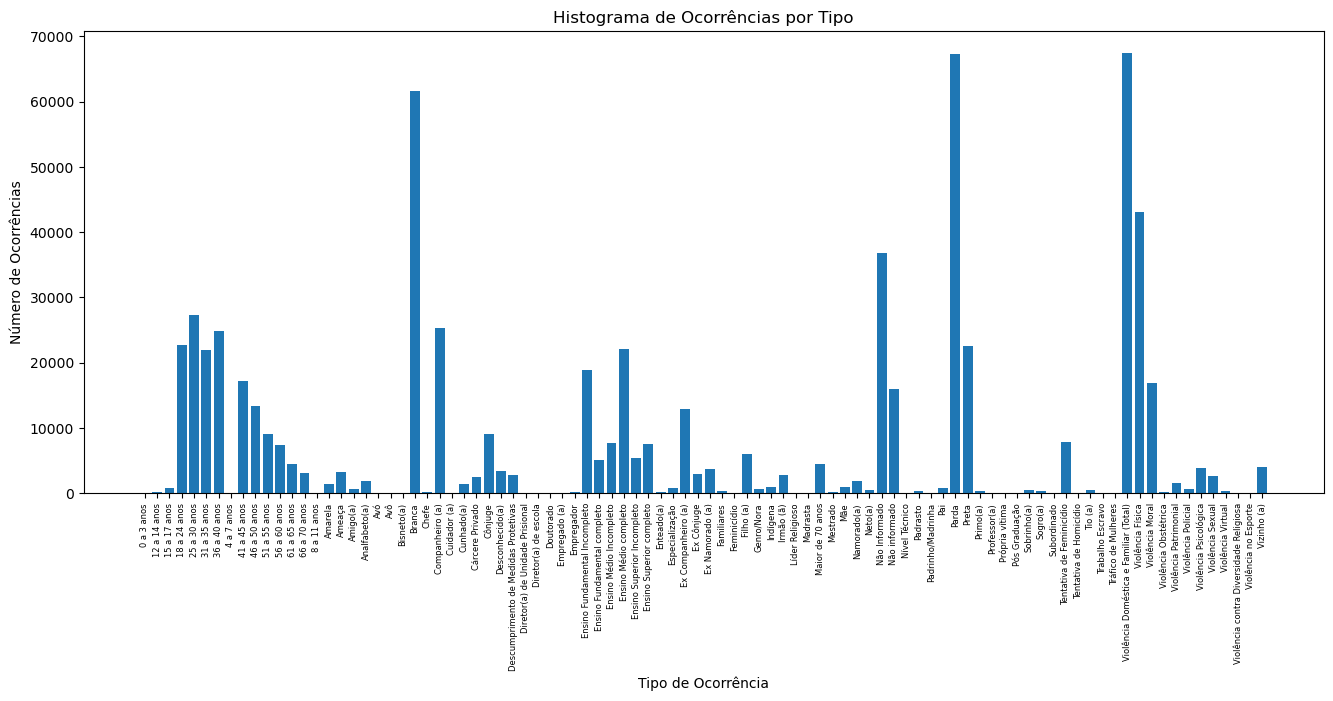

In [21]:
# HISTOGRAMA
# Agrupar por tipo de ocorrência e somar as ocorrências
agrupado = df_geral.groupby('ocorrencia')['n_ocorrencia_mes'].sum().reset_index()

# Definir o tamanho da figura (largura x altura)
plt.figure(figsize=(16, 6))

# Criar o histograma
plt.bar(agrupado['ocorrencia'], agrupado['n_ocorrencia_mes'])
plt.xlabel('Tipo de Ocorrência')
plt.ylabel('Número de Ocorrências')
plt.title('Histograma de Ocorrências por Tipo')

# Ajustar tamanho da fonte dos rótulos do eixo x
plt.xticks(fontsize=6)

# Rotacione os rótulos do eixo x para melhor legibilidade (opcional)
plt.xticks(rotation=90)

plt.show()

In [22]:
df_relacao = df_geral[(df_geral['variavel'] == 'relacao_vitima_suspeito') &
                        (df_geral['n_ocorrencia_mes'] != 0)]

df_pivot = pd.pivot_table(df_relacao, values = 'n_ocorrencia_mes', index=['mes', 'variavel', 'ocorrencia'])

In [23]:
df_relacao_group = df_relacao.groupby('ocorrencia')
soma_por_group = df_relacao_group['n_ocorrencia_mes'].sum()

print(soma_por_group.nlargest(5))

ocorrencia
Companheiro (a)       25346
Ex Companheiro (a)    12923
Cônjuge                9114
Filho (a)              5945
Não Informado          5933
Name: n_ocorrencia_mes, dtype: int64


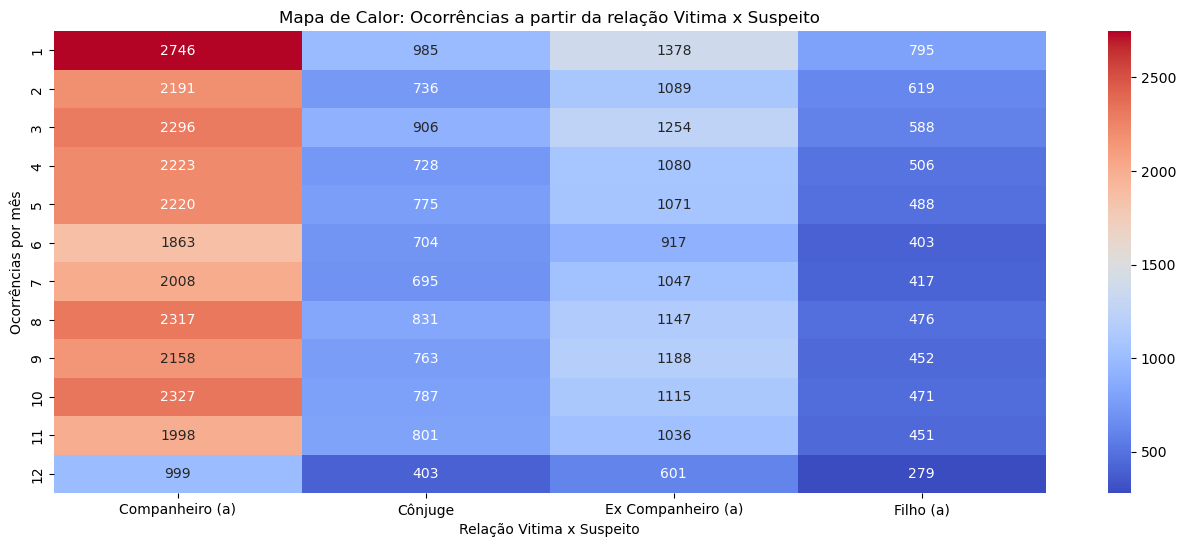

In [24]:
df_geral_filter_ocorrencia = df_geral[(df_geral['ocorrencia'] == 'Companheiro (a)') |
                        (df_geral['ocorrencia'] == 'Ex Companheiro (a)') |
                        (df_geral['ocorrencia'] == 'Cônjuge') |
                        (df_geral['ocorrencia'] == 'Filho (a)')]


df_geral_filter_ocorrencia = df_geral_filter_ocorrencia.copy()
df_geral_filter_ocorrencia.loc[:, 'mes'] = df_geral_filter_ocorrencia['mes'].astype(int)

heatmap_data = df_geral_filter_ocorrencia.pivot_table(index='mes', columns='ocorrencia', values='n_ocorrencia_mes', aggfunc='sum')

# Criar um mapa de calor usando Seaborn
plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='g')
plt.title('Mapa de Calor: Ocorrências a partir da relação Vitima x Suspeito')

plt.xlabel('Relação Vitima x Suspeito')
plt.ylabel('Ocorrências por mês')

plt.show()

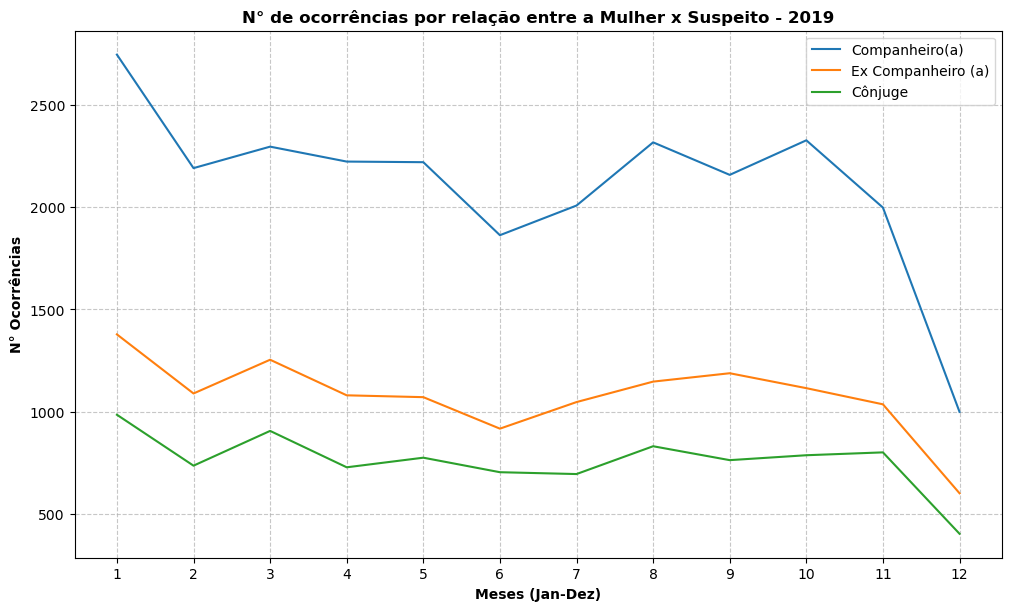

In [25]:
df_rel_comp = df_relacao[(df_relacao['ocorrencia'] == 'Companheiro (a)')]
df_rel_excomp = df_relacao[(df_relacao['ocorrencia'] == 'Ex Companheiro (a)')]
df_rel_conju = df_relacao[(df_relacao['ocorrencia'] == 'Cônjuge')]

plt.figure(figsize=(10, 6), layout='constrained')

# Habilitar as grades
plt.grid(True, linestyle='--', alpha=0.7)

plt.plot(df_rel_comp['mes'], df_rel_comp['n_ocorrencia_mes'], label='Companheiro(a)')  # Plot some data on the (implicit) axes.
plt.plot(df_rel_excomp['mes'], df_rel_excomp['n_ocorrencia_mes'], label='Ex Companheiro (a)')  # Plot some data on the (implicit) axes.
plt.plot(df_rel_conju['mes'], df_rel_conju['n_ocorrencia_mes'], label='Cônjuge')  # Plot some data on the (implicit) axes.

plt.xlabel('Meses (Jan-Dez)', fontweight='bold')
plt.ylabel('N° Ocorrências', fontweight='bold')
plt.title("N° de ocorrências por relação entre a Mulher x Suspeito - 2019", fontweight='bold')
plt.legend()

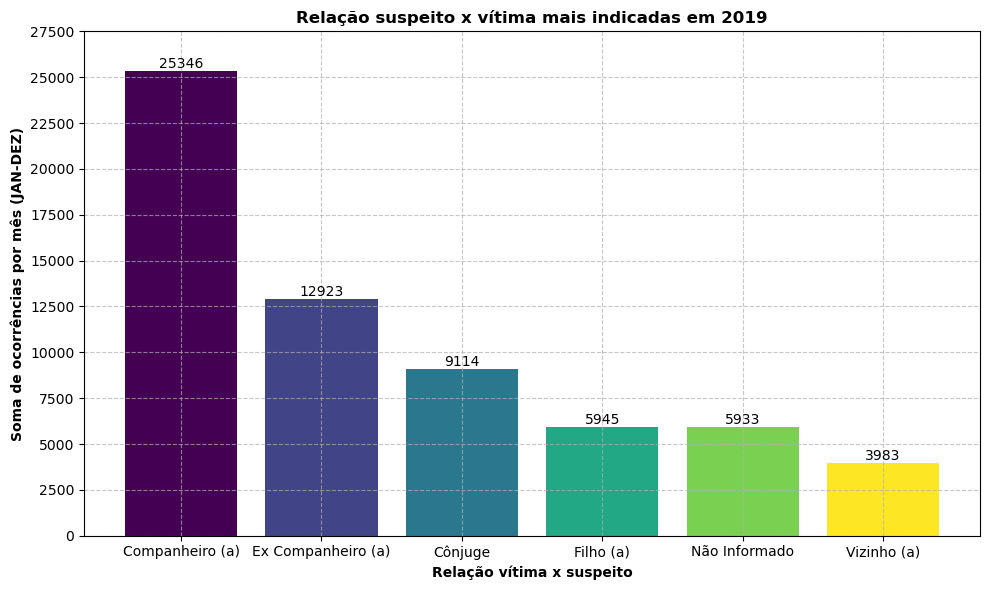

In [26]:
# Se você já possui o DataFrame 'soma_por_group' com as 5 categorias mais indicadas
# Você pode prosseguir a partir daqui
soma_por_group_top6 = soma_por_group.nlargest(6)

# Criar um gráfico de barras empilhadas
plt.figure(figsize=(10, 6))  # Define o tamanho do gráfico

# Habilitar as grades
plt.grid(True, linestyle='--', alpha=0.7)

# Definir limite inferior do eixo y para zero
plt.ylim(bottom=0)

# Definir intervalo dos marcadores do eixo y (a cada 2500)
plt.yticks(range(0, int(max(soma_por_group_top6.values)) + 2500, 2500))

# Definir cores para as barras
cores = plt.cm.viridis(np.linspace(0, 1, 6))  # Exemplo: usando a paleta de cores "viridis"

# Plotar as barras empilhadas
barras = plt.bar(soma_por_group_top6.index, soma_por_group_top6.values, color=cores)

# Definir rótulos e título
plt.xlabel('Relação vítima x suspeito', fontweight='bold')
plt.ylabel('Soma de ocorrências por mês (JAN-DEZ)', fontweight='bold')
plt.title('Relação suspeito x vítima mais indicadas em 2019', fontweight='bold')

# Rotacionar os rótulos do eixo x para facilitar a leitura, se necessário
plt.xticks(rotation=0)

# Adicionar os valores em cima das barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura, str(int(altura)), ha='center', va='bottom')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### PORTANTO, COM RELAÇÃO A PRIMEIRA PERGUNTA:
R: As relações entre vítima e suspeito que mais possuem relato de abuso/violência no ano de 2019, são:
1 - Companheiro(a) - 2536 denúncias no ano,
2- Ex-Companheiro(a) - 12923 denúncias no ano,
3- Cônjuge - 9114 denúncias no ano,
4- Filho(a) - 5945 denúncias no ano.

*5933 denúncias não souberam informar ou não informaram a relação da vítima com o suspeito.

<font color="purple">Segundo pesquisas realizadas pelo IBGE e PNAD em 2009 (10 anos atrás) já se observava este mesmo contexto:</font> "Ao observarmos a distribuição percentual pelo tipo de agressor, notamos que a maior parte das agressões contra mulheres é perpetrada por pessoas conhecidas, cônjuges e ex‐cônjuges, e parentes; somadas, representam quase 70% dos casos."

-----------------------------------------------------------------------------------------------------

## ESCOLARIDADE DAS VÍTIMAS
### 2) Qual o nível de escolaridade das mulheres que relatam abusos/violência?

In [27]:
df_escola = df_geral[(df_geral['variavel'] == 'escolaridade_da_vitima')]

df_pivot_escola = pd.pivot_table(df_escola, values = 'ocorrencia', index=['mes', 'variavel', 'ocorrencia'])

df_pivot_escola

n_ocorrencia_mes
mes variavel               ocorrencia                                     
1   escolaridade_da_vitima Analfabeto(a)                             237.0
                           Doutorado                                   7.0
                           Ensino Fundamental Incompleto            1999.0
                           Ensino Fundamental completo               611.0
                           Ensino Médio Incompleto                   823.0
...                                                                    ...
9   escolaridade_da_vitima Especialização                             77.0
                           Mestrado                                   16.0
                           Não informado                            1295.0
                           Nível Técnico                               0.0
                           Pós Graduação                               0.0

[156 rows x 1 columns]

In [28]:
df_escola_group = df_escola.groupby('ocorrencia')
soma_por_group_2 = df_escola_group['n_ocorrencia_mes'].sum()

print('MAIOR:\n', soma_por_group_2.nlargest(5),'\n')
print('MENOR:\n', soma_por_group_2.nsmallest(5))

MAIOR:
 ocorrencia
Ensino Médio completo            22053
Ensino Fundamental Incompleto    18910
Não informado                    15978
Ensino Médio Incompleto           7656
Ensino Superior completo          7450
Name: n_ocorrencia_mes, dtype: int64 

MENOR:
 ocorrencia
Nível Técnico       0
Pós Graduação       0
Doutorado          26
Mestrado          142
Especialização    830
Name: n_ocorrencia_mes, dtype: int64


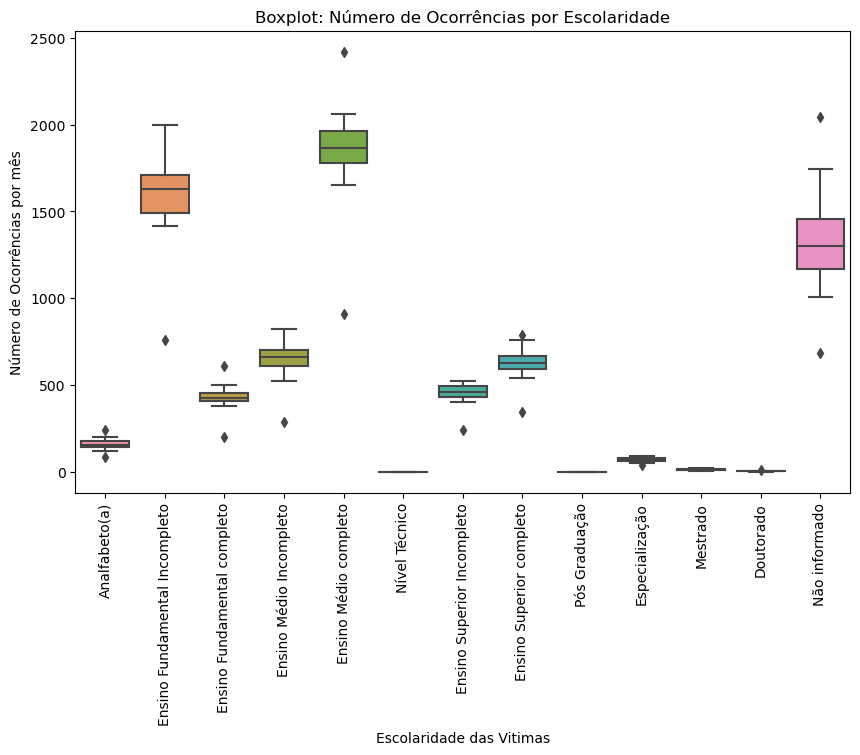

In [29]:
#boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocorrencia', y='n_ocorrencia_mes', data=df_escola)
plt.title('Boxplot: Número de Ocorrências por Escolaridade')
plt.xlabel('Escolaridade das Vitimas')
plt.ylabel('Número de Ocorrências por mês')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()

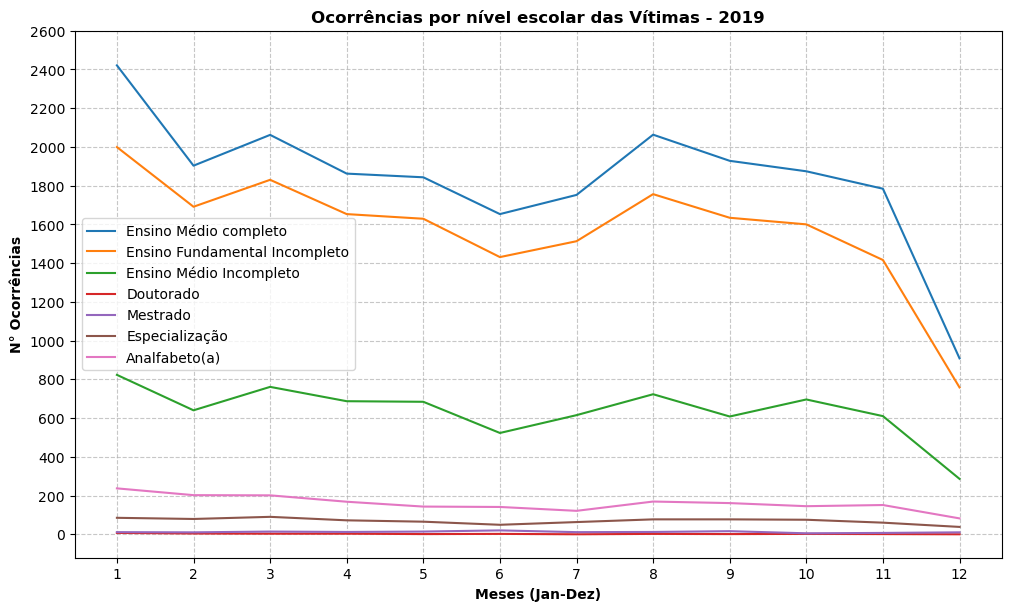

In [30]:
df_medio_completo = df_escola[(df_escola['ocorrencia'] == 'Ensino Médio completo')]
df_fund_incompleto = df_escola[(df_escola['ocorrencia'] == 'Ensino Fundamental Incompleto')]
df_medio_incompleto = df_escola[(df_escola['ocorrencia'] == 'Ensino Médio Incompleto')]

df_doutorado = df_escola[(df_escola['ocorrencia'] == 'Doutorado')]
df_mestrado = df_escola[(df_escola['ocorrencia'] == 'Mestrado')]
df_especializacao = df_escola[(df_escola['ocorrencia'] == 'Especialização')]

df_analfabeto = df_escola[(df_escola['ocorrencia'] == 'Analfabeto(a)')]

plt.figure(figsize=(10, 6), layout='constrained')

# Habilitar as grades
plt.grid(True, linestyle='--', alpha=0.7)

plt.plot(df_medio_completo['mes'], df_medio_completo['n_ocorrencia_mes'], label='Ensino Médio completo')  # Plot some data on the (implicit) axes.
plt.plot(df_fund_incompleto['mes'], df_fund_incompleto['n_ocorrencia_mes'], label='Ensino Fundamental Incompleto')  # Plot some data on the (implicit) axes.
plt.plot(df_medio_incompleto['mes'], df_medio_incompleto['n_ocorrencia_mes'], label='Ensino Médio Incompleto')  # Plot some data on the (implicit) axes.

plt.plot(df_doutorado['mes'], df_doutorado['n_ocorrencia_mes'], label='Doutorado')  # Plot some data on the (implicit) axes.
plt.plot(df_mestrado['mes'], df_mestrado['n_ocorrencia_mes'], label='Mestrado')  # Plot some data on the (implicit) axes.
plt.plot(df_especializacao['mes'], df_especializacao['n_ocorrencia_mes'], label='Especialização')  # Plot some data on the (implicit) axes.

plt.plot(df_analfabeto['mes'], df_analfabeto['n_ocorrencia_mes'], label='Analfabeto(a)')  # Plot some data on the (implicit) axes.

# Calcula os valores dos rótulos do eixo y com intervalos de x
intervalo_y = 200
valor_maximo_y = max(df_medio_completo['n_ocorrencia_mes'])  # Use a coluna com os maiores valores como referência
rótulos_y = np.arange(0, valor_maximo_y + intervalo_y, intervalo_y)

plt.xlabel('Meses (Jan-Dez)', fontweight='bold')
plt.ylabel('N° Ocorrências', fontweight='bold')
plt.title("Ocorrências por nível escolar das Vítimas - 2019", fontweight='bold')
plt.legend()

# Configura os rótulos do eixo y
plt.yticks(rótulos_y)

# Mostrar o gráfico
plt.show()

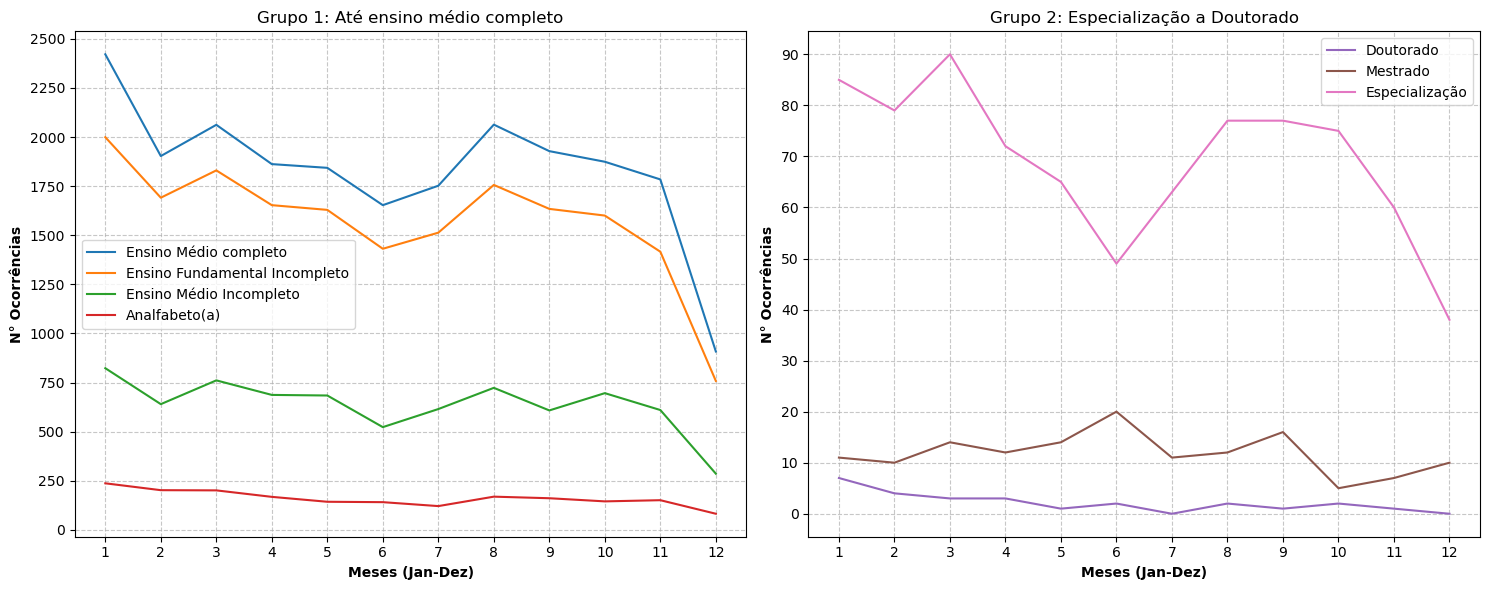

In [31]:
import itertools

# Grupos de dados
grupos = {
    'Grupo 1': ['Ensino Médio completo', 'Ensino Fundamental Incompleto', 'Ensino Médio Incompleto', 'Analfabeto(a)'],
    'Grupo 2': ['Doutorado', 'Mestrado', 'Especialização']
}

# Calcula os valores dos rótulos do eixo y com intervalos de 250
intervalo_y_0 = 250
valor_maximo_y_0 = max(df_medio_completo['n_ocorrencia_mes'])
rotulos_y_0 = np.arange(0, valor_maximo_y_0 + intervalo_y_0, intervalo_y_0)

intervalo_y_1 = 10
valor_maximo_y_1 = max(df_especializacao['n_ocorrencia_mes'])  # Use a coluna com os maiores valores como referência
rotulos_y_1 = np.arange(0, valor_maximo_y_1 + intervalo_y_1, intervalo_y_1)

# Cria uma figura com 1 linha e 2 colunas para os subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Configura os títulos dos subplots
axs[0].set_title('Grupo 1: Até ensino médio completo')
axs[1].set_title('Grupo 2: Especialização a Doutorado')

# Ciclo de cores
cores = itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# Loop para criar plots para cada grupo
for i, (titulo, grupo) in enumerate(grupos.items()):
    axs[i].grid(True, linestyle='--', alpha=0.7)
    axs[i].set_xlabel('Meses (Jan-Dez)', fontweight='bold')
    axs[i].set_ylabel('N° Ocorrências', fontweight='bold')
      
    for ocorrencia in grupo:
        df_grupo = df_escola[df_escola['ocorrencia'] == ocorrencia]
        # Use a próxima cor no ciclo de cores
        cor = next(cores)
        axs[i].plot(df_grupo['mes'], df_grupo['n_ocorrencia_mes'], label=ocorrencia, color=cor)

    # Verifica se há rótulos no gráfico antes de chamar axs[i].legend()
    if any(line.get_label() for line in axs[i].get_lines()):
        axs[i].legend()

    if i == 0:
        axs[i].set_yticks(rotulos_y_0)
    else:
        axs[i].set_yticks(rotulos_y_1)

# Ajusta o layout
plt.tight_layout()

# Mostrar os subplots
plt.show()

### PORTANTO, COM RELAÇÃO A SEGUNDA PERGUNTA:
- O nível escolar da <font color= 'red'>maior parte das vítimas</font> é: 1. ensino médio completo, 2. ensino fundamental incompleto e 3. ensino médio incompleto, respectivamente.
- Com relação ao <font color= 'green'>nível de escolaridade menos relatado</font>: Doutorado, Mestrado e Especialização.

Além disso, dados de pesquisas externas, como o **"Sistema Viva Inquérito 2006-2011"**, mostram que mulheres com os mesmos níveis de escolaridade relatados como os mais comuns entre aquelas que sofrem algum tipo de violência também apresentam maior incidência de tentativas de suicídio e lesões autoprovocadas.

--------------------------------------------------------------------------------------------------------

## IDADE E RAÇA DAS VÍTIMAS
### 3) Como as  denúncias se classificam com relação a idade e raça das vítimas?

In [32]:
df_idade_vit = df_geral[(df_geral['variavel'] == 'idade_vitima')]

df_pivot_idade_vit = pd.pivot_table(df_idade_vit, values = 'ocorrencia', index=['mes', 'variavel', 'ocorrencia'])

df_pivot_idade_vit

n_ocorrencia_mes
mes variavel     ocorrencia                        
1   idade_vitima 0 a 3 anos                     0.0
                 12 a 14 anos                   5.0
                 15 a 17 anos                  13.0
                 18 a 24 anos                1556.0
                 25 a 30 anos                1437.0
...                                             ...
9   idade_vitima 61 a 65 anos                 202.0
                 66 a 70 anos                 134.0
                 8 a 11 anos                    2.0
                 Maior de 70 anos             237.0
                 Não Informado                237.0

[204 rows x 1 columns]

In [33]:
df_idade_vit_group = df_idade_vit.groupby('ocorrencia')
soma_por_group_3 = df_idade_vit_group['n_ocorrencia_mes'].sum()

print('MAIOR:\n', soma_por_group_3.nlargest(5),'\n')
print('MENOR:\n', soma_por_group_3.nsmallest(5))

MAIOR:
 ocorrencia
18 a 24 anos    14593
25 a 30 anos    14154
36 a 40 anos    12206
31 a 35 anos    11185
41 a 45 anos     8617
Name: n_ocorrencia_mes, dtype: int64 

MENOR:
 ocorrencia
0 a 3 anos       2
4 a 7 anos       4
8 a 11 anos      4
12 a 14 anos    15
15 a 17 anos    69
Name: n_ocorrencia_mes, dtype: int64


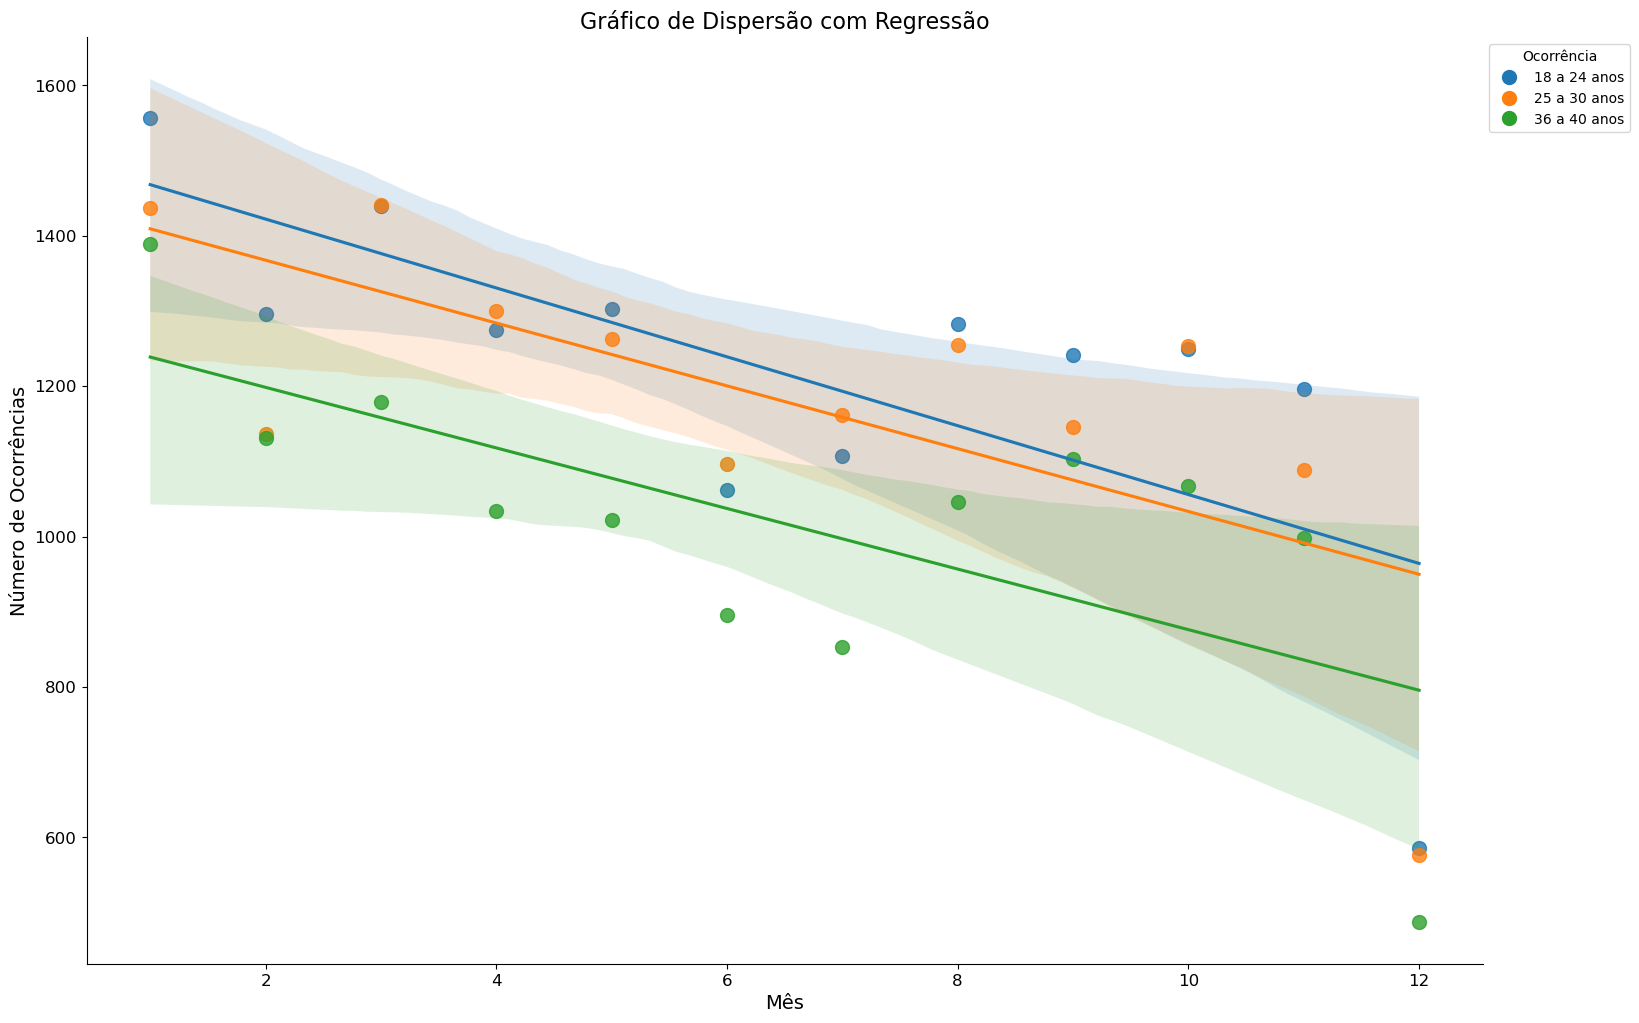

In [34]:
df_idade_vitima = df_geral[df_geral['variavel'] == 'idade_vitima']
df_idade_vitima = df_idade_vitima[(df_idade_vitima['ocorrencia'] == '18 a 24 anos') |
                                 (df_idade_vitima['ocorrencia'] == '25 a 30 anos') |
                                 (df_idade_vitima['ocorrencia'] == '36 a 40 anos')]

# Mapeando as strings da coluna 'ocorrencia' para valores numéricos usando replace
ocorrencia_mapping = {
    '18 a 24 anos': 1,
    '25 a 30 anos': 2,
    '36 a 40 anos': 3,
}

df_idade_vitima['ocorrencia_numeric'] = df_idade_vitima['ocorrencia'].replace(ocorrencia_mapping)
df_idade_vitima['mes'] = df_idade_vitima['mes'].astype(int)
df_idade_vitima['n_ocorrencia_mes'] = df_idade_vitima['n_ocorrencia_mes'].astype(int)

# Aumentar o tamanho do gráfico
plot = sns.lmplot(x='mes', y='n_ocorrencia_mes', data=df_idade_vitima, hue='ocorrencia_numeric',
                  hue_order=sorted(ocorrencia_mapping.values()), fit_reg=True, scatter_kws={'s': 100},
                  height=10, aspect=1.5)  # Ajuste os valores de height e aspect conforme necessário

# Remover a legenda automática do Seaborn
plot._legend.set_visible(False)

# Adicionar linhas auxiliares para criar uma legenda personalizada
legend_labels = {v: k for k, v in ocorrencia_mapping.items()}
colors = sns.color_palette(n_colors=len(set(ocorrencia_mapping.values())))

handles = [plt.Line2D([0], [0], marker='o', color=colors[i - 1], markersize=10, linewidth=0) for i in
           sorted(ocorrencia_mapping.values())]

# Adicionar legenda personalizada
plt.legend(handles, legend_labels.values(), title='Ocorrência', bbox_to_anchor=(1, 1), loc='upper left')

# Personalizar a legenda dos eixos e aumentar as fontes
ax = plt.gca()
ax.set_xlabel('Mês', fontsize=14)  # Personalize conforme necessário
ax.set_ylabel('Número de Ocorrências', fontsize=14)  # Personalize conforme necessário
ax.tick_params(axis='both', labelsize=12)  # Ajustar o tamanho dos rótulos dos ticks

plt.title('Gráfico de Dispersão com Regressão', fontsize=16)  # Personalize conforme necessário

# Ajustar globalmente o tamanho da fonte
plt.rc('font', size=12)

plt.show()

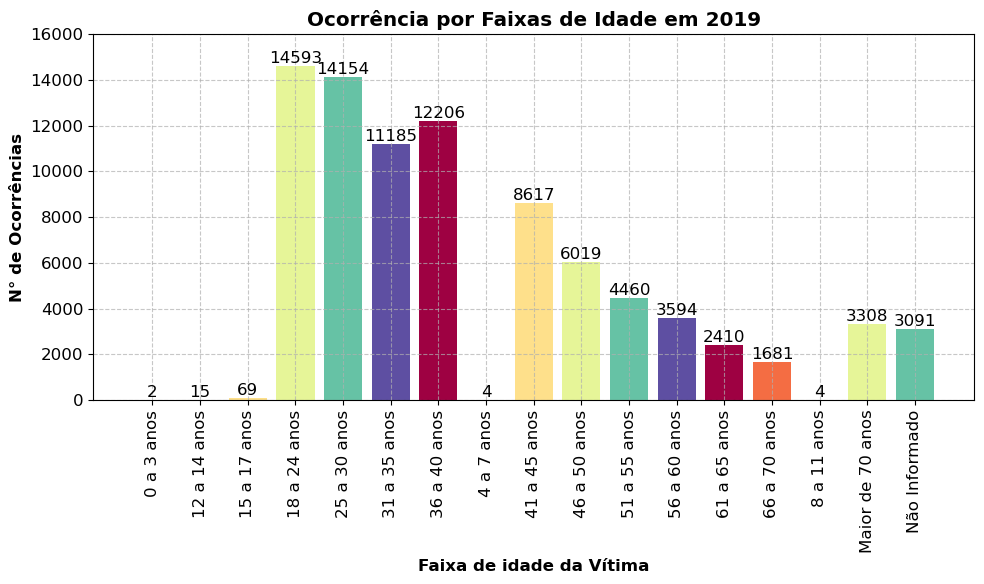

In [35]:
# df_idade_vit

# Define as faixas de idade
faixas_idade_valor = df_idade_vit_group['n_ocorrencia_mes'].sum()

# Cria um gráfico de barras
plt.figure(figsize=(10, 6))  #tamanho do gráfico

# Habilitar as grades
plt.grid(True, linestyle='--', alpha=0.7)

# limite inferior do eixo y para zero
plt.ylim(bottom=0)

# intervalo dos marcadores do eixo y (a cada 2500)
plt.yticks(range(0, int(faixas_idade_valor.nlargest(1)) + 2000, 2000))

# cores para as barras
cores = plt.cm.Spectral(np.linspace(0, 1, 6))  # Exemplo: usando a paleta de cores "viridis"

# plotar
barras = plt.bar(faixas_idade_valor.index, faixas_idade_valor.values, color=cores)

# valores em cima das barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura, str(int(altura)), ha='center', va='bottom')
    
# rótulos e título
plt.xlabel('Faixa de idade da Vítima', fontweight='bold')
plt.ylabel('N° de Ocorrências', fontweight='bold')
plt.title('Ocorrência por Faixas de Idade em 2019', fontweight='bold')

# rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=90)

# Show
plt.tight_layout()
plt.show()

---------------------------------------------------------------------------------------------------------------

In [36]:
df_raca_vit = df_geral[(df_geral['variavel'] == 'raca_vitima')]

df_pivot_raca_vit = pd.pivot_table(df_raca_vit, values = 'ocorrencia', index=['mes', 'variavel', 'ocorrencia'])

df_raca_vit['ocorrencia'].unique()

array(['Amarela', 'Branca', 'Indígena', 'Parda', 'Preta', 'Não Informado'],
      dtype=object)

In [37]:
df_raca_vit_group = df_raca_vit.groupby('ocorrencia')
soma_por_group_4 = df_raca_vit_group['n_ocorrencia_mes'].sum()

print('MAIOR:\n', soma_por_group_4.nlargest(5),'\n')
print('MENOR:\n', soma_por_group_4.nsmallest(5))

MAIOR:
 ocorrencia
Parda            37081
Branca           31888
Preta            10096
Não Informado     5029
Amarela            792
Name: n_ocorrencia_mes, dtype: int64 

MENOR:
 ocorrencia
Indígena           526
Amarela            792
Não Informado     5029
Preta            10096
Branca           31888
Name: n_ocorrencia_mes, dtype: int64


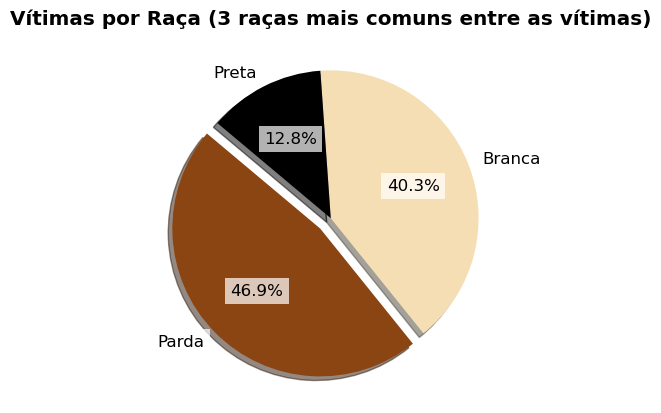

In [38]:
# Selecione os três maiores valores
top3 = soma_por_group_4.nlargest(3)

# Rótulos para as fatias do gráfico
labels = top3.index

# Valores para as fatias do gráfico
sizes = top3.values

# Cores para as fatias do gráfico
colors = ['#8B4513', '#F5DEB3', 'black']

# Explode a primeira fatia (opcional, para destacar)
explode = (0.1, 0, 0)

# Cria o gráfico de pizza
# Cria o gráfico de pizza com rótulos formatados
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Adiciona um título
plt.title('Vítimas por Raça (3 raças mais comuns entre as vítimas)', fontweight='bold')

# Adiciona um fundo branco atrás dos valores na cor preta
for text in ax.texts:
    if text.get_color() == 'black':
        text.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Mostra o gráfico
plt.show()

### PORTANTO, COM RELAÇÃO A TERCEIRA E QUARTA PERGUNTA:

**VÍTIMA:**

**Com relação a idade:**
- As mulheres que mais relatam abuso/violência conforme faixa etária, são:
1. 18-24 anos
2. 25-30 anos
3. 36-40 anos
4. 31-35 anos

- As idades com menor frequência:
1. 0-3 anos
2. 4-7 anos
3. 8-11 anos

**Com relação a raça/cor:**
Dentre as mulheres que denunciam algum tipo de abuso/violência se declaram:
- 46.9% pardas;
- 40.3% brancas
- 12.8% pretas


---------------------------------------------------------------------------------------------------------------